<a href="https://colab.research.google.com/github/kplr-training/Machine-Learning/blob/main/FR/Supervised/classification/02_Logistic_Regression_Cancer_Solution_FR.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apprentissage supervisé :

### Classification (données catégorielles).
Dans la classification, nous essayons de prédire à partir d'une liste de choix prédéfinis.

- Classification binaire (tumeur : bénigne, maligne).
- Classification multi-classe (livres : mathématiques, physique, statistiques, psychologie, etc.)
- Exemples d'algorithmes : KNN, modèles linéaires, arbres de décision, SVM, etc.

### Régression (données continues).
- Prédire le revenu d'une personne en fonction de son âge, de son niveau d'éducation, etc. ou prédire le marché boursier, etc.
- Exemples d'algorithmes : KNN, modèles linéaires, arbres de décision, SVM, etc.

Modèles linéaires (LinReg, LogReg, Lasso, Ridged, etc.) : font des prédictions en fonction d'une fonction linéaire des caractéristiques d'entrée.
De nombreux algorithmes ML (y compris ceux spécifiés ci-dessus) peuvent être utilisés à la fois pour la classification et la régression.

## <center> Régression logistique </center>

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
# Prerequisites : Necessary imports

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

1. Diviser les données.
2. Instanciez la régression logistique avec les paramètres par défaut.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [4]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

# This is better than KNN

Accuracy on the training subset: 0.946
Accuracy on the test subset: 0.958


#### Comment l'améliorer ?

La régularisation est utilisée pour éviter le overfitting (over-training).


Pénalité : La norme utilisée dans la pénalisation.
- L1 - suppose que seules quelques caractéristiques sont importantes.
- L2 - ne suppose pas que seules quelques caractéristiques sont importantes - utilisé par défaut dans la régression logistique de scikit-learn.

'C' : Paramètre permettant de contrôler la force de la régularisation. Par défaut, C est égal à 1.
- C inférieur => log_reg s'ajuste à la majorité des points de données.
- C plus élevé => classification correcte de chaque point de données.

#### Pouvons-nous travailler avec les paramètres pour l'améliorer encore ?
    
Instanciez la régression logistique avec le paramètre C.
1. Le paramètre C permet de contrôler la force de la régularisation. Par défaut, C est égal à 1.
2. Paramètre Max_iter Nombre maximum d'itérations nécessaires pour que les solveurs convergent.
3. Solveur {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs : Algorithme à utiliser dans le problème d'optimisation.

- Pour les petits ensembles de données, 'liblinear' est un bon choix, tandis que 'sag' et 'saga' sont plus rapides pour les grands ensembles.
- Pour les problèmes multiclasses, seuls 'newton-cg', 'sag', 'saga' et 'lbfgs' gèrent les pertes multinomiales ;

In [5]:
log_reg001 = LogisticRegression(C=0.01, max_iter=10000)
log_reg001.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.953
Accuracy on the test subset: 0.951


C plus élevé et nombre d'itérations plus important.

In [6]:
log_reg100 = LogisticRegression(C=100, max_iter=10000)
log_reg100.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.981
Accuracy on the test subset: 0.965


- Voyons comment fonctionne la régression linéaire dans les problèmes de régression.
- Le W (poids) et le B (offset) de l'axe Y.

In [8]:
import sys
!{sys.executable} -m pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.3 MB/s eta 0:00:00


w[0]: 0.393906  b: -0.031804


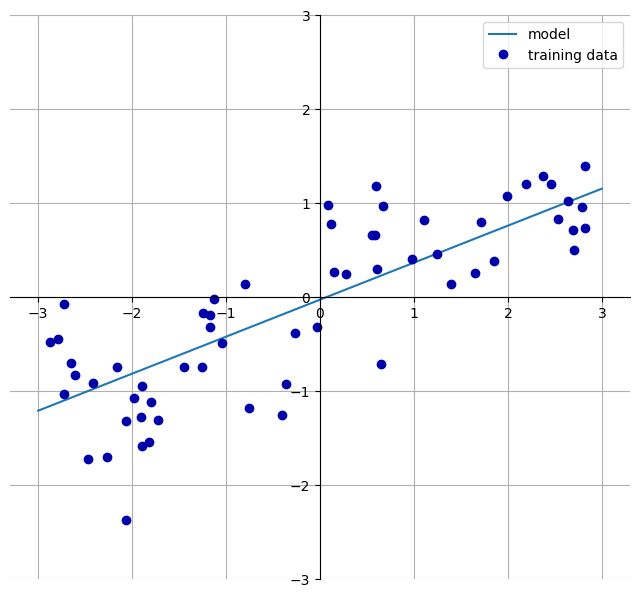

In [9]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- Pour voir les coefficients appris pour les trois C différents.
Une régularisation plus forte déplace les coefficients vers zéro, mais ce ne sont pas des zéors.

- Ce type de visualisation donne une meilleure interprétation et permet de déterminer comment chaque caractéristique contribue à la limite de décision ou à la classification des cancers.
contribue à la decision boundary ou à la classification des cancers.

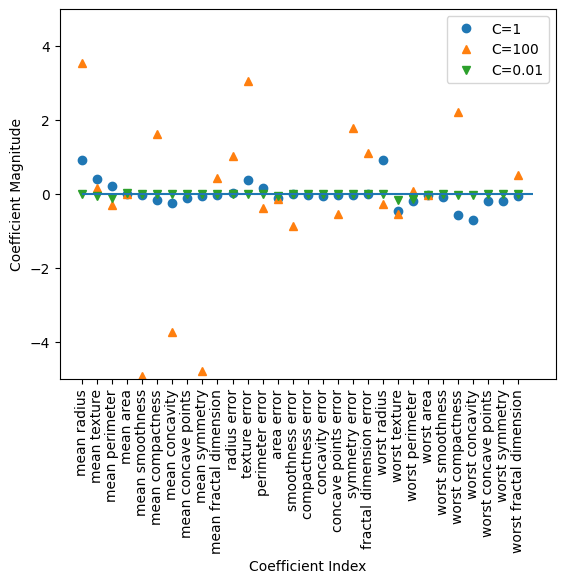

In [10]:
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

Les modèles linéaires font des prédictions basées sur une fonction linéaire des caractéristiques d'entrée : y = (w * x) + b.
- W est le poids (ou le coefficient accessible via .coef_).
- B est le offset (ou l'interception accessible via .intercept_) de l'axe des y. Les deux sont des paramètres appris.
- Y est la prédiction (ou la décision).

Exemple pour un ensemble de données avec une seule caractéristique d'entrée : y = (w[0] * x[0]) + b.

La régression logistique est un cas spécifique de modèle linéaire et son équation se présente comme suit : y = (w[0] * x[0]) + (w[1] * x[1]) + ... + (w[p] * x[p]) + b.


Les modèles linéaires fonctionnent bien avec les grands ensembles de données, ils sont rapides à former et rapides à prédire. Cependant, il existe d'autres modes qui se généralisent mieux dans les espaces de faible dimension.